<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Sánchez Chicaiza, Jefferson Miguel** 

**22-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [3]:
!pip install biopython
!pip install reportlab
!pip install nglview
from Bio import Entrez
from Bio import SeqIO
import re
import csv 
import re
import pandas as pd 
from collections import Counter

In [4]:
import miningscience as msc
msc.download_pubmed
msc.mining_pubs
help(msc)


Help on module miningscience:

NAME
    miningscience

FUNCTIONS
    download_pubmed(keyword)
    
    mining_pubs(tipo)

FILE
    /home/jeffo/Documentos/GitHub/E2_ExamenParcial_Python/miningscience.py





## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [30]:
keyword = "Ecuador Genomics" #definir key words
import miningscience as msc
pr= msc.download_pubmed
pr(keyword)

with open('./pubmed-EcuadorGen-set.txt', encoding="utf8") as f:
    my_text = f.read()

my_text = re.sub(r'\n\s{6}', ' ', my_text)

m = re.findall(r"(PMID:\s\w+)", my_text)
print('El PMID es:')
print(m[:1])

El número de artículos es:
55
El PMID es:
['PMID: 33574202']


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [109]:
import miningscience as msc
pub_año = msc.mining_pubs("DP")
print (pub_año.iloc[0:5])
print (pub_año.iloc[725:])
pub_autor = msc.mining_pubs("AU")
print (pub_autor.iloc[0:5])
print (pub_autor.iloc[725:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:5])
print (countries.iloc[100:])

       PMID   Año
0  29636833  2018
1  31822297  2019
2  33419936  2021
3  29632024  2018
4  32917887  2020
Empty DataFrame
Columns: [PMID, Año]
Index: []
       PMID  Numero de autores
0  29636833                  2
1  31822297                  3
2  33419936                 26
3  29632024                 33
4  32917887                 30
Empty DataFrame
Columns: [PMID, Numero de autores]
Index: []
        pais  cuantos autores
0    Ecuador             1155
1  Venezuela               42
2    Belgium               84
3  Australia              109
4         UK              290
         pais  cuantos autores
100     Ghana                3
101    Rwanda                2
102  Bulgaria                4
103  HarvardH                4
104        US                5
105  Botswana                3
106   Croatia                2
107   Tunisia                2
108  Mongolia                2
109   Albania                2
110   Belarus                2
111    Brunei                2
112   Lebanon  

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


In [123]:
import pandas as pd
import matplotlib.pyplot as plot
from collections import Counter

pub_año["Año"] = pub_año["Año"].astype("int")
media = pub_año["Año"].mean()
desviacion = pub_año["Año"].std()
print ("La media es: ", media)
print ("La desviación estandar es: ", desviacion)



La media es:  2018.6312056737588
La desviación estandar es:  1.9934576743346768


Text(0, 0.5, 'articulos')

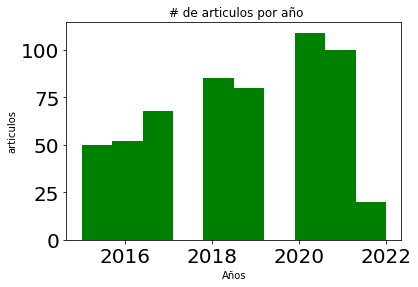

In [129]:
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter

intervalos = range(min(pub_año["Año"]), max(pub_año["Año"]))
plot.hist(x=pub_año["Año"], color = "green")
plot.title(" # de articulos por año")
plot.xlabel("Años")
plot.ylabel("articulos")

Text(0, 0.5, 'Repeticiones')

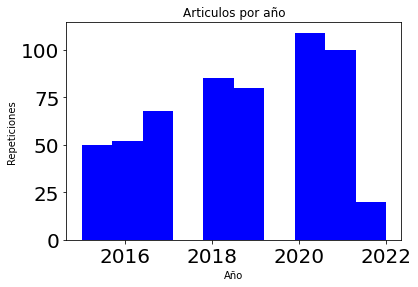

In [132]:
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter


intervalos = range(0, 1000)
plot.hist(x=pub_año["Año"], color = "blue")
plot.title("Articulos por año")
plot.xlabel("Año")
plot.ylabel("Repeticiones")


## Ejercicio 5 [1 punto]

Interprete los resultados del 

la media en publicación es de 2018 articulos en rangos de 2 años, y con una desviación estandar de 1.99  

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [ ]:
#guardar esto 
with open("./sequence.seq") as s:#llamo a la base de datos donde estan las IDs
    Entrez.email ="jefferson.sanchez@est.ikiam.edu.ec" 
    with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id='AH001795.2, AH001792.2, AH001788.2, AH001793.2, AH001796.2, AH001791.2, AM295801.1, AM296499.1, AJ278725.1, AJ278723.1'
                  ) as handle: 
        for seq_record in SeqIO.parse(handle, "gb"): 
            print("%s %s..." % (seq_record.id, seq_record.description[:100])) 
            print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                                  len(seq_record.features), 
                                                                  seq_record.annotations["source"], ) )

        

In [7]:

from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os



In [8]:

clustalw_exe = r"/home/jeffo/Documentos/GitHub/E2_ExamenParcial_Python/clustalw-2.1-linux-x86_64-libcppstatic/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "./16S.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

/home/jeffo/Documentos/GitHub/E2_ExamenParcial_Python/clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 -infile=./16S.fasta


In [9]:
ClustalAlign = AlignIO.read("./16S.aln", "clustal")
print(ClustalAlign[0:10])

Alignment with 4 rows and 1533 columns
--------------------------------------------...TTA NR_114599.1
------------------------------------ATGCCTAA...--- NR_041888.1
AGACTTTGATCATGGCTCAGATTGAACGCTGGCGGCATGCCTAA...--- NR_114748.1
---------------CTCAGATTGAACGCTGGCGGCATGCCTAA...--- NR_074193.1


<class 'Bio.Align.MultipleSeqAlignment'>


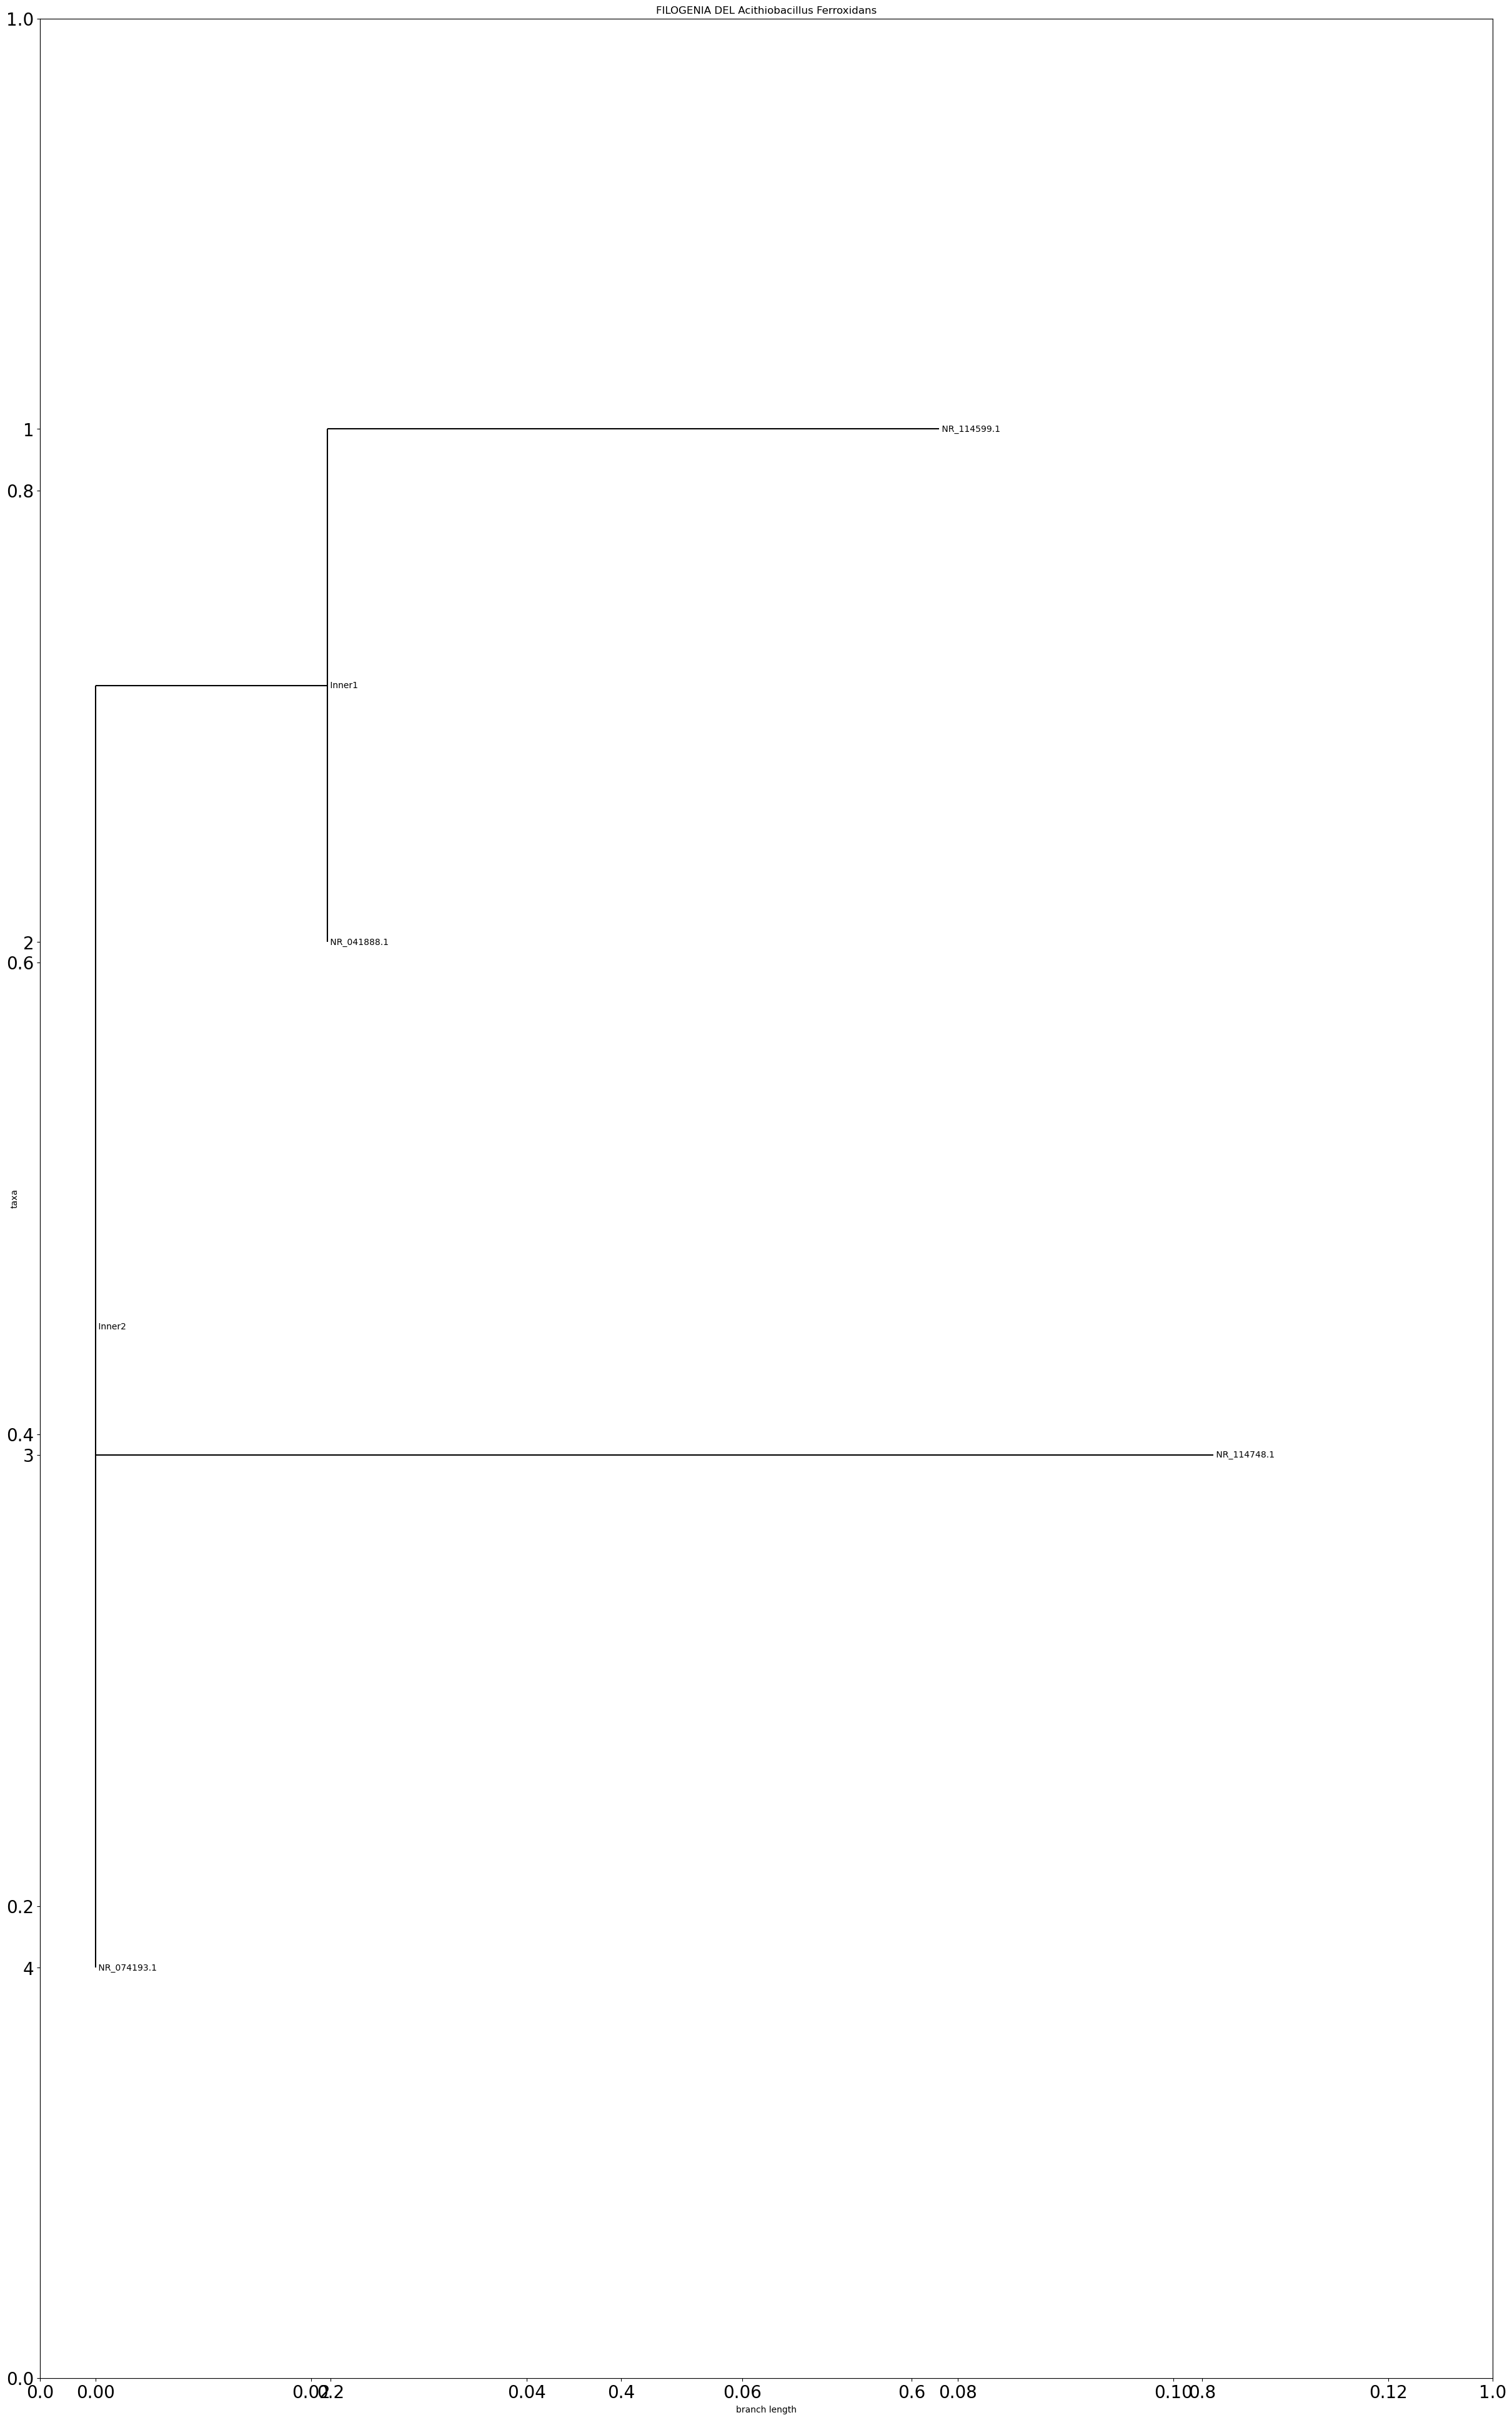

In [10]:
from Bio import Phylo
tree = Phylo.read("./16S.dnd", "newick")

with open("./16S.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

staphy1_tree = constructor.build_tree(alignment)
staphy1_tree.rooted = True


Phylo.write(staphy1_tree, "./sequence.xml", "phyloxml")
arsequence = Phylo.read(file="./sequence.xml", format= "phyloxml")


import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 50), dpi=100) 
matplotlib.rc('font', size=10)              
matplotlib.rc('xtick', labelsize=20)       
matplotlib.rc('ytick', labelsize=20) 

plt.title("FILOGENIA DEL Acithiobacillus Ferroxidans") 
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(arsequence, axes=axes)
fig.savefig("./sequence.png")

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```